In [1]:
import torch
from torch import nn

In [2]:
torch.__version__

'2.5.1'

In [3]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [5]:
import os
def walk_thru_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'path: {dirpath} \n dirname: {dirnames} \n filenames: {filenames} \n')

In [6]:
from pathlib import Path

image_path = Path('Data')

In [7]:
walk_thru_dir(image_path)

path: Data 
 dirname: ['Test', 'Train'] 
 filenames: [] 

path: Data\Test 
 dirname: ['label'] 
 filenames: [] 

path: Data\Test\label 
 dirname: [] 
 filenames: ['image_1.jpg', 'image_10.jpg', 'image_100.jpg', 'image_101.jpg', 'image_102.jpg', 'image_103.jpg', 'image_104.jpg', 'image_105.jpg', 'image_106.jpg', 'image_107.jpg', 'image_108.jpg', 'image_109.jpg', 'image_11.jpg', 'image_110.jpg', 'image_111.jpg', 'image_112.jpg', 'image_113.jpg', 'image_114.jpg', 'image_115.jpg', 'image_116.jpg', 'image_117.jpg', 'image_118.jpg', 'image_119.jpg', 'image_12.jpg', 'image_120.jpg', 'image_121.jpg', 'image_122.jpg', 'image_123.jpg', 'image_124.jpg', 'image_125.jpg', 'image_126.jpg', 'image_127.jpg', 'image_128.jpg', 'image_129.jpg', 'image_13.jpg', 'image_130.jpg', 'image_131.jpg', 'image_132.jpg', 'image_133.jpg', 'image_134.jpg', 'image_135.jpg', 'image_136.jpg', 'image_137.jpg', 'image_138.jpg', 'image_139.jpg', 'image_14.jpg', 'image_140.jpg', 'image_141.jpg', 'image_142.jpg', 'image_143.

In [8]:
train_dir = image_path / 'Train'
test_dir = image_path / 'Test'

train_dir, test_dir

(WindowsPath('Data/Train'), WindowsPath('Data/Test'))

In [9]:
image_path

WindowsPath('Data')

Data\Test\label\image_21.jpg
Image class: label
Image height: 152
Image width: 331


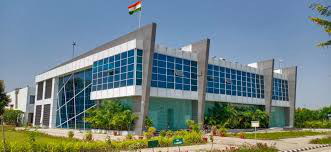

In [10]:
import random
from PIL import Image

image_path_list = list(image_path.glob('*/*/*'))

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(f'Image class: {image_class}')

img = Image.open(random_image_path)

print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

(-0.5, 330.5, 151.5, -0.5)

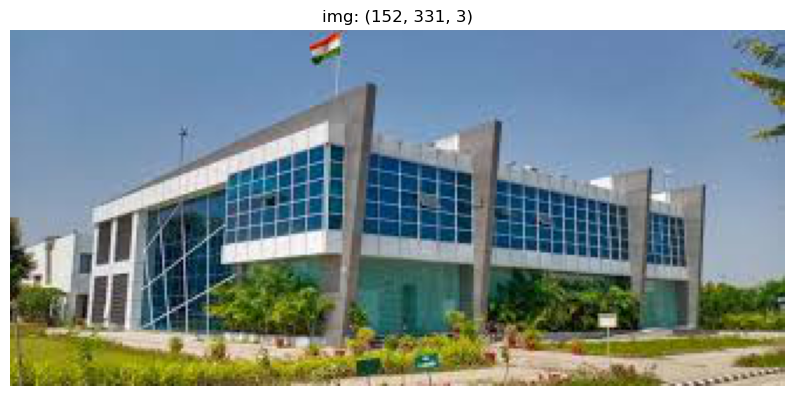

In [11]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'img: {img_as_array.shape}')
plt.axis(False)

In [12]:
data_transform = transforms.Compose(
    [
        transforms.Resize(size=(236, 236)),
        transforms.ToTensor()
    ]
)

In [13]:
# import torchvision


# weights = torchvision.models.ResNet152_Weights.DEFAULT
# data_transformer = weights.transforms()

In [14]:
data_transform(img)

tensor([[[0.3961, 0.3961, 0.3961,  ..., 0.3686, 0.3765, 0.3804],
         [0.3961, 0.3961, 0.3961,  ..., 0.3804, 0.3765, 0.3725],
         [0.3961, 0.3961, 0.3961,  ..., 0.3922, 0.3765, 0.3686],
         ...,
         [0.4784, 0.4392, 0.4471,  ..., 0.8431, 0.8353, 0.8588],
         [0.4549, 0.3647, 0.4118,  ..., 0.8196, 0.8314, 0.8588],
         [0.4353, 0.3098, 0.3882,  ..., 0.7882, 0.8235, 0.8549]],

        [[0.5529, 0.5529, 0.5529,  ..., 0.5137, 0.5216, 0.5216],
         [0.5529, 0.5529, 0.5529,  ..., 0.5216, 0.5176, 0.5137],
         [0.5529, 0.5529, 0.5529,  ..., 0.5294, 0.5176, 0.5098],
         ...,
         [0.4863, 0.4549, 0.4353,  ..., 0.7804, 0.7725, 0.7961],
         [0.4706, 0.3804, 0.4039,  ..., 0.7569, 0.7686, 0.7961],
         [0.4549, 0.3255, 0.3804,  ..., 0.7255, 0.7608, 0.7922]],

        [[0.6941, 0.6941, 0.6941,  ..., 0.6157, 0.6314, 0.6549],
         [0.6941, 0.6941, 0.6941,  ..., 0.6275, 0.6314, 0.6471],
         [0.6941, 0.6941, 0.6941,  ..., 0.6471, 0.6392, 0.

In [15]:
train_data = datasets.ImageFolder(root='New_Data',
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform)
train_set, val_set = torch.utils.data.random_split(train_data, [0.8, 0.2])


In [16]:
class_names = train_data.classes
class_names

['AI', 'Real']

In [17]:
class_dict = train_data.class_to_idx
class_dict

{'AI': 0, 'Real': 1}

In [18]:
len(train_data), len(test_data)

(590, 199)

In [19]:
len(train_set), len(val_set)

(472, 118)

In [20]:
train_data[0]

(tensor([[[0.0431, 0.0353, 0.0510,  ..., 0.4980, 0.4196, 0.3451],
          [0.0471, 0.0353, 0.0471,  ..., 0.4980, 0.5137, 0.4863],
          [0.0431, 0.0314, 0.0431,  ..., 0.5059, 0.5137, 0.3373],
          ...,
          [0.1686, 0.1412, 0.1373,  ..., 0.2392, 0.2471, 0.2392],
          [0.1098, 0.0980, 0.1137,  ..., 0.2392, 0.2431, 0.2157],
          [0.1451, 0.1333, 0.1216,  ..., 0.2549, 0.2549, 0.2392]],
 
         [[0.0863, 0.0667, 0.1216,  ..., 0.4196, 0.3686, 0.3569],
          [0.0824, 0.0667, 0.1176,  ..., 0.4157, 0.4784, 0.5098],
          [0.0784, 0.0667, 0.1216,  ..., 0.4706, 0.5137, 0.3686],
          ...,
          [0.1725, 0.1451, 0.1451,  ..., 0.2157, 0.2275, 0.2157],
          [0.1216, 0.1098, 0.1294,  ..., 0.2157, 0.2196, 0.1961],
          [0.1608, 0.1490, 0.1373,  ..., 0.2235, 0.2275, 0.2157]],
 
         [[0.1176, 0.1059, 0.1804,  ..., 0.3765, 0.3333, 0.3451],
          [0.1176, 0.1059, 0.1765,  ..., 0.3922, 0.4824, 0.5137],
          [0.1176, 0.1059, 0.1765,  ...,

In [21]:
train_data.samples[0]

('New_Data\\AI\\image_0.jpg', 0)

In [22]:
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_set,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=8
                              )
val_dataloader = DataLoader(dataset=val_set,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=8
                             )
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=8
                             )
len(train_dataloader), len(val_dataloader), len(test_dataloader)

(15, 4, 7)

In [23]:
img, label = next(iter(train_dataloader))
img, label

(tensor([[[[0.4431, 0.5569, 0.2588,  ..., 0.4078, 0.8157, 1.0000],
           [0.4314, 0.6196, 0.4235,  ..., 0.4667, 0.8902, 0.9961],
           [0.4431, 0.6392, 0.5255,  ..., 0.4627, 0.8588, 1.0000],
           ...,
           [0.6196, 0.4549, 0.4353,  ..., 0.5490, 0.5804, 0.6314],
           [0.4941, 0.4549, 0.4902,  ..., 0.5412, 0.5490, 0.5686],
           [0.4745, 0.4941, 0.5098,  ..., 0.4627, 0.4980, 0.5294]],
 
          [[0.0549, 0.1647, 0.1059,  ..., 0.3255, 0.8118, 1.0000],
           [0.0431, 0.1725, 0.1804,  ..., 0.3922, 0.8902, 1.0000],
           [0.0431, 0.1529, 0.2353,  ..., 0.3882, 0.8588, 1.0000],
           ...,
           [0.4471, 0.1961, 0.1490,  ..., 0.4745, 0.5098, 0.5608],
           [0.2235, 0.1647, 0.1765,  ..., 0.4706, 0.4824, 0.5059],
           [0.1608, 0.1765, 0.1804,  ..., 0.3922, 0.4353, 0.4706]],
 
          [[0.0431, 0.1333, 0.0353,  ..., 0.3059, 0.8078, 0.9882],
           [0.0353, 0.1490, 0.0784,  ..., 0.3686, 0.8745, 0.9843],
           [0.0353, 0.14

In [24]:
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units*8,
                    kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units*8,
                      out_channels=hidden_units*16,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=hidden_units*16,
                    out_channels=hidden_units*32,
                    kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*144*32,
                      out_features=hidden_units*32),
            nn.Dropout(0.3),
            nn.Linear(in_features=hidden_units*32,
                      out_features=hidden_units*64),
            nn.Linear(in_features=hidden_units*64,
                      out_features=output_shape)
        )
    
    def forward(self, x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [25]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=32,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 256, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=147456, out_features=1024, bias=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=2048, bias=True)
    (4): Linear(in_features=2048, out_featu

In [26]:
image_batch, label_batch = next(iter(val_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 236, 236]), torch.Size([32]))

In [27]:
model_0(image_batch.to(device))

tensor([[0.0126, 0.0122],
        [0.0143, 0.0098],
        [0.0114, 0.0110],
        [0.0141, 0.0135],
        [0.0144, 0.0082],
        [0.0146, 0.0113],
        [0.0115, 0.0140],
        [0.0151, 0.0082],
        [0.0148, 0.0144],
        [0.0072, 0.0117],
        [0.0148, 0.0134],
        [0.0118, 0.0117],
        [0.0136, 0.0119],
        [0.0150, 0.0116],
        [0.0132, 0.0077],
        [0.0142, 0.0115],
        [0.0138, 0.0116],
        [0.0123, 0.0137],
        [0.0145, 0.0109],
        [0.0159, 0.0116],
        [0.0113, 0.0098],
        [0.0130, 0.0123],
        [0.0130, 0.0064],
        [0.0137, 0.0113],
        [0.0137, 0.0044],
        [0.0087, 0.0141],
        [0.0139, 0.0105],
        [0.0127, 0.0066],
        [0.0129, 0.0088],
        [0.0120, 0.0111],
        [0.0117, 0.0089],
        [0.0142, 0.0103]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [28]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.sigmoid(y_pred), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [29]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module):
    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += (test_pred_labels==y).sum().item()/len(test_pred_labels)

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [30]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    results = {
        'train_loss': [],
        'train_acc': [],
        'test_loss': [],
        'test_acc': []
    }
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                           dataloader=test_dataloader,
                                           loss_fn=loss_fn)
        print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}')

        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

    return results      

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer

start_time = timer()
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=val_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn)
end_time = timer()
print(f'Total training time: {(end_time-start_time)}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 13.7242 | Train acc: 0.5673 | Test loss: 0.9560 | Test acc: 0.5714
Epoch: 1 | Train loss: 0.5475 | Train acc: 0.7404 | Test loss: 0.7180 | Test acc: 0.6473
Epoch: 2 | Train loss: 0.4920 | Train acc: 0.7656 | Test loss: 0.4243 | Test acc: 0.7723
Epoch: 3 | Train loss: 0.4422 | Train acc: 0.7933 | Test loss: 0.4224 | Test acc: 0.8036
Epoch: 4 | Train loss: 0.3600 | Train acc: 0.8558 | Test loss: 0.4759 | Test acc: 0.7589
Total training time: 1020.3550535000031


In [80]:
model_0_results

{'train_loss': [4.540764935811361,
  0.697618285814921,
  0.6532017469406128,
  0.5922107517719268,
  0.5814814805984497],
 'train_acc': [0.5395833333333333,
  0.5791666666666667,
  0.6020833333333333,
  0.7076388888888889,
  0.7166666666666667],
 'test_loss': [0.6608092933893204,
  0.6770457923412323,
  0.6378864794969559,
  0.6256698817014694,
  0.6232327520847321],
 'test_acc': [0.6633522727272727,
  0.5745738636363636,
  0.6789772727272727,
  0.7215909090909091,
  0.6669034090909091]}

In [50]:
torch.save(model_0, 'model_0.pth')

In [54]:
import pandas as pd
index = []
def get_index(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        for filename in filenames:
            index.append(filename.split('.')[0])

def get_preds(model, dataloader):
    with torch.inference_mode():
        test_pred_labels=[]
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)
            for i in (test_pred_logits.argmax(dim=1)).to('cpu').numpy().tolist():
                  test_pred_labels.append(i)
        submission_df = pd.DataFrame(test_pred_labels, columns=['Label'])
        submission_df['Label'] = submission_df['Label'].map({0: 'AI',
                                                 1: 'Real'})
        image_path = Path('Test/Test_Images')
        get_index(image_path)
        submission_df['Id'] = index
        submission_df = submission_df[['Id', 'Label']]
        submission_df.to_csv('./submission_2.csv', index=False)

In [82]:
get_preds(model_0,test_dataloader)

ValueError: Length of values (200) does not match length of index (199)

In [40]:
BATCH_SIZE = 32
test_data_2 = datasets.ImageFolder('Test',data_transform)
test_dataloader_2 = DataLoader(test_data_2, 
                               batch_size=BATCH_SIZE,
                               shuffle=False,
                               num_workers=8)

In [55]:
get_preds(model_0,test_dataloader_2)

In [32]:
import torchvision


weights = torchvision.models.ResNet152_Weights.DEFAULT
data_transformer = weights.transforms()

In [42]:
train_data_1 = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
train_data_2 = datasets.ImageFolder(root="New_Data",
                                  transform=data_transform,
                                  target_transform=None)
train_data = train_data_1 + test_data_2
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform)
train_set, val_set = torch.utils.data.random_split(train_data, [0.8, 0.2])

In [44]:
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_set,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=8
                              )
val_dataloader = DataLoader(dataset=val_set,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=8
                             )
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=8
                             )
len(train_dataloader), len(val_dataloader), len(test_dataloader)

(26, 7, 7)

In [45]:
model_1 = torchvision.models.resnet152().to(device)

In [47]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=val_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.9048 | Train acc: 0.6719 | Test loss: 1.2520 | Test acc: 0.6429
Epoch: 1 | Train loss: 0.4323 | Train acc: 0.8305 | Test loss: 0.4109 | Test acc: 0.7902
Epoch: 2 | Train loss: 0.3824 | Train acc: 0.8389 | Test loss: 0.3832 | Test acc: 0.8795
Epoch: 3 | Train loss: 0.4123 | Train acc: 0.8245 | Test loss: 0.8243 | Test acc: 0.8482
Epoch: 4 | Train loss: 0.4413 | Train acc: 0.8269 | Test loss: 0.5996 | Test acc: 0.8125


In [48]:
model_1_results

{'train_loss': [0.9048261562219033,
  0.4322937486263422,
  0.3823668844997883,
  0.41229304098165953,
  0.44125068617554813],
 'train_acc': [0.671875,
  0.8305288461538461,
  0.8389423076923077,
  0.8245192307692307,
  0.8269230769230769],
 'test_loss': [1.252013887677874,
  0.4109004352773939,
  0.38321529754570555,
  0.8243063379611287,
  0.5996405184268951],
 'test_acc': [0.6428571428571429,
  0.7901785714285714,
  0.8794642857142857,
  0.8482142857142857,
  0.8125]}

In [51]:
get_preds(model_1, test_dataloader_2)

In [34]:
import os
from pathlib import Path

data_path = Path("C:/Users/HP/Downloads/induction-task/New_Data")

ai_dir = data_path / "AI"
real_dir = data_path / "Real"

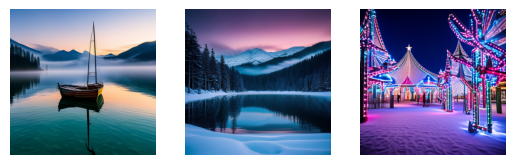

In [35]:
import random
from PIL import Image
ai_image_path_list = list(Path(ai_dir).glob("*.jpg"))
random_ai_image = random.sample(ai_image_path_list, k=3)

i = 1
for image_path in random_ai_image:
    plt.subplot(1, 3, i)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis(False)
    i += 1

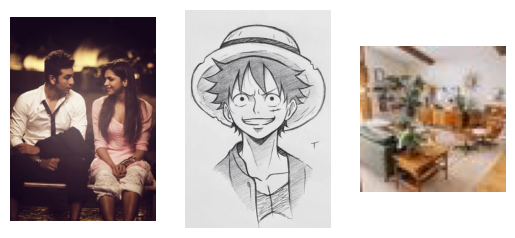

In [36]:
import random
from PIL import Image
real_image_path_list = list(Path(real_dir).glob("*.jpg"))
random_real_image = random.sample(real_image_path_list, k=3)

i = 1
for image_path in random_real_image:
    plt.subplot(1, 3, i)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis(False)
    i += 1

In [37]:
new_data_path = Path("new_Data")
new_data_path.mkdir(parents=True, exist_ok=True)

train_path = new_data_path / "train"
test_path = new_data_path / "test"

os.mkdir(train_path)
os.mkdir(test_path)

train_ai_split = int(len(ai_image_path_list) * 0.8)
train_real_split = int(len(real_image_path_list) * 0.8)

train_ai_img = random.sample(ai_image_path_list, k=train_ai_split)
train_real_img = random.sample(real_image_path_list, k=train_real_split)

test_ai_img = []
test_real_img = []

for ai_img in ai_image_path_list:
    if ai_img not in train_ai_img:
        test_ai_img.append(ai_img)
    
for real_img in real_image_path_list:
    if real_img not in train_real_img:
        test_real_img.append(real_img)
print(f"ai_image_path_list: {len(ai_image_path_list)}")
print(f"real_image_path_list: {len(real_image_path_list)}")
print(f"train_ai_img: {len(train_ai_img)}")
print(f"train_real_img: {len(train_real_img)}")
print(f"test_ai_img: {len(test_ai_img)}")
print(f"test_real_img: {len(test_real_img)}")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'newData\\train'

In [38]:
train_ai_path = train_path / "AiArt"
train_real_path = train_path / "RealArt"
test_ai_path = test_path / "AiArt"
test_real_path = test_path / "RealArt"

os.mkdir(train_ai_path)
os.mkdir(train_real_path)
os.mkdir(test_ai_path)
os.mkdir(test_real_path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'newData\\train\\AiArt'

In [39]:
import shutil
for img in train_ai_img:
    shutil.copy(img, train_ai_path)
for img in train_real_img:
    shutil.copy(img, train_real_path)
for img in test_ai_img:
    shutil.copy(img, test_ai_path)
for img in test_real_img:
    shutil.copy(img, test_real_path)

NameError: name 'train_ai_img' is not defined

In [40]:
for dirpaths, dirnames, filenames in os.walk(new_data_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpaths}'.")

There are 2 directories and 0 images in 'newData'.
There are 2 directories and 0 images in 'newData\test'.
There are 0 directories and 81 images in 'newData\test\AiArt'.
There are 0 directories and 80 images in 'newData\test\RealArt'.
There are 2 directories and 0 images in 'newData\train'.
There are 0 directories and 320 images in 'newData\train\AiArt'.
There are 0 directories and 320 images in 'newData\train\RealArt'.


In [91]:
weights = torchvision.models.ResNet152_Weights.DEFAULT
weights

ResNet152_Weights.IMAGENET1K_V2

In [92]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [93]:
train_data = datasets.ImageFolder(root=train_path,
                                 transform=auto_transforms)
test_data = datasets.ImageFolder(root=test_path,
                                transform=auto_transforms)

In [94]:
class_names = train_data.classes
class_names

['AiArt', 'RealArt']

In [95]:
num_workers = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=32,
                             num_workers=num_workers,
                             shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                            batch_size=32,
                            num_workers=num_workers,
                            shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ea73084530>,
 <torch.utils.data.dataloader.DataLoader at 0x1ea730870e0>)

In [96]:
model = torchvision.models.resnet152(weights="IMAGENET1K_V2").to(device)

In [97]:
from torchinfo import summary
summary(model=model,
        input_size=(32, 3, 224, 224),
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   128                  True
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     4,096                True
│    │    └─BatchN

In [98]:
for param in model.conv1.parameters():
    param.requires_grad = False
for param in model.bn1.parameters():
    param.requires_grad = False
for param in model.layer1.parameters():
    param.requires_grad = False
for param in model.layer2.parameters():
    param.requires_grad = False
for param in model.layer3.parameters():
    param.requires_grad = False
for param in model.layer4.parameters():
    param.requires_grad = False

In [99]:
summary(model=model,
        input_size=(32, 3, 224, 224),
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (4,096)              False
│    │    

In [100]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [101]:
model.fc = nn.Sequential(
nn.Dropout(p=0.5),   
nn.Linear(in_features=2048, out_features=1024, bias=True),
nn.Dropout(p=0.5),
nn.Linear(in_features=1024, out_features=1, bias=True),
)

In [102]:
model.fc

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=2048, out_features=1024, bias=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=1024, out_features=1, bias=True)
)

In [103]:
summary(model=model,
        input_size=(32, 3, 224, 224),
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1]              --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (4,096)              False
│    │    

In [104]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [105]:
import torcheval
from torcheval.metrics import BinaryAccuracy
def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor):
    metric = BinaryAccuracy(threshold=0.5)
    metric.update(y_pred, y_true)
    return metric.compute().item()

In [106]:
accuracy_fn(torch.tensor([0, 0, 0, 1]), torch.Tensor([0.2, 0.9, 0.9, 0.9]))

0.5

In [107]:
img, label = next(iter(train_dataloader))
pred = model(img.to(device))
print(pred.squeeze())
print(torch.sigmoid(pred.squeeze()))
pred.squeeze().shape, label.shape

tensor([ 0.0447,  0.1323,  0.1146,  0.2378,  0.1202, -0.2363,  0.0396,  0.5915,
        -0.3027,  0.2972,  0.0429, -0.0920,  0.0402,  0.0891, -0.3664, -0.2130,
         0.0071, -0.5156,  0.1341, -0.1675,  0.0612, -0.1219,  0.5178, -0.2987,
         0.2909, -0.4121,  0.2446, -0.0504,  0.2417,  0.1664,  0.2295, -0.0044],
       device='cuda:0', grad_fn=<SqueezeBackward0>)
tensor([0.5112, 0.5330, 0.5286, 0.5592, 0.5300, 0.4412, 0.5099, 0.6437, 0.4249,
        0.5738, 0.5107, 0.4770, 0.5101, 0.5223, 0.4094, 0.4469, 0.5018, 0.3739,
        0.5335, 0.4582, 0.5153, 0.4696, 0.6266, 0.4259, 0.5722, 0.3984, 0.5609,
        0.4874, 0.5601, 0.5415, 0.5571, 0.4989], device='cuda:0',
       grad_fn=<SigmoidBackward0>)


(torch.Size([32]), torch.Size([32]))

In [108]:
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn):
    
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X).squeeze()
        
        loss = loss_fn(y_pred, y.float())
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_acc += accuracy_fn(y_true=y, y_pred=torch.sigmoid(y_pred))
        
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    
    model.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            
            test_pred_logits = model(X).squeeze()
            if batch == 5:
                continue
            else:
                loss = loss_fn(test_pred_logits, y.float())
            test_loss += loss.item()
            
            test_acc += accuracy_fn(y_true=y, y_pred=torch.sigmoid(test_pred_logits))
            
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    
    return test_loss, test_acc

In [109]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
         loss_fn: torch.nn.Module,
         optimizer: torch.optim.Optimizer,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         accuracy_fn,
         epochs: int = 5):
    
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    for epoch in tqdm(range(epochs)):
        
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          accuracy_fn=accuracy_fn)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        accuracy_fn=accuracy_fn)
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

In [110]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

start_time = timer()

results = train(model=model,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               train_dataloader=train_dataloader,
               test_dataloader=test_dataloader,
               epochs=10)

end_time = timer()

print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2592 | train_acc: 0.8875 | test_loss: 0.0804 | test_acc: 0.9812
Epoch: 2 | train_loss: 0.0970 | train_acc: 0.9719 | test_loss: 0.0384 | test_acc: 0.9812
Epoch: 3 | train_loss: 0.0633 | train_acc: 0.9812 | test_loss: 0.0527 | test_acc: 0.9750
Epoch: 4 | train_loss: 0.0513 | train_acc: 0.9891 | test_loss: 0.0348 | test_acc: 0.9875
Epoch: 5 | train_loss: 0.0354 | train_acc: 0.9859 | test_loss: 0.0286 | test_acc: 0.9938
Epoch: 6 | train_loss: 0.0241 | train_acc: 0.9938 | test_loss: 0.0267 | test_acc: 0.9938
Epoch: 7 | train_loss: 0.0266 | train_acc: 0.9906 | test_loss: 0.0260 | test_acc: 0.9938
Epoch: 8 | train_loss: 0.0200 | train_acc: 0.9953 | test_loss: 0.0268 | test_acc: 0.9938
Epoch: 9 | train_loss: 0.0094 | train_acc: 0.9969 | test_loss: 0.0273 | test_acc: 0.9938
Epoch: 10 | train_loss: 0.0134 | train_acc: 0.9969 | test_loss: 0.0269 | test_acc: 0.9938
[INFO] Total training time: 202.483 seconds


In [111]:
out_data = datasets.ImageFolder(root=test_dir,
                                  transform=auto_transforms)

In [112]:
out_dataloader = DataLoader(dataset=out_data,
                            batch_size=32,
                            num_workers=num_workers,
                            shuffle=False)